# Ring Opening/Closing

A classic example of organic chemistry is a pericyclic reaction. Let us use the example of the electrocyclic reaction that interconverts butadiene and cyclobutene.

## Intrinsic Reaction Coordinate

The best way to follow this reaction is to start with the cyclobutene and stretch the breaking bond to estimate the structure of the transition state. Then we perform a ytransition state optimization to get the structure of the TS.

Now we can follow the path of the reaction downhill from the TS in both directions. This will allow more than just the single coordinate that was being driven in the PES scan to be followed as we return to product and will be a better representation of the overall reaction coordinate.

## Start with the Build

Cyclic structures do not work well with Z-matrices for describibg geometry. Forcing a frozen bond length change will necesitate changes in bends and torsions in adjacent atoms which may require bond length changes to accommodate these values which will require changes in bends and torsions in adjacent atoms, ad infinitum. Sometimes a Z-matrix works, but often it results in intractable computational problems.

It is better to use cartesian coordinates in these systems. But, how do we get a set of xyz coordnates for a molecule? We could look uop a set from databases on the web and cyclobutadiene is a small molecule and very likely to be represented in databases. I will start with a Z-matrix for butadiene and alter it to make the bond angles and lengths resemble cyclobutene and then allow the system to optimize without constraints

I used the Z-matrix from previous butadiene builds. Consider the code below and observe that I made the dihedral angle zero degrees. This is the s-cis conformer. I then changed the bend angle of the terminal carbon atons (A_321) to 90 degrees to make it square and bring the ends together. I changed the torsion angle of a terminal hydrogen (D2) to 90 degrees to get it out to the side of the structure.

In [21]:
# use psi4conda environment
import psi4
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import helpers as hp # Many useful functions from https://lcbc-epfl.github.io/iesm-public/intro.html

psi4.core.clean_options()

output_file = "butadiene.log"

psi4.set_memory("2GB")
psi4.set_output_file(output_file, append=False, loglevel=20, print_header=True, inherit_loglevel=True, execute=True)
psi4.core.set_num_threads(4)

# The Z-matrix as a text string ### From previous optimization
data = """
       0 1
    C1
    C2      1    CC1
    C3      2    CC2           1  A_321
    C4      3    CC1           2  A_321           1     dihedral
    H5      1    CH_5_9        2  CH_512          3     D3
    H6      1    CH_6_10       5  CH_615          2     D2
    H7      2    CH_7_8        1  CH_721          3     D1
    H8      3    CH_7_8        4  CH_721          2     D1
    H9      4    CH_5_9        3  CH_512          2     D3
    H10     4    CH_6_10       9  CH_615          3     D2

       symmetry c2
       dihedral  =  2
       CC1 = 1.3
       CC2 = 1.5
       CH_5_9 = 1.0
       CH_7_8 = 1.0
       CH_6_10 = 1.0
       A_321 = 90
       CH_512 = 120
       CH_615 = 120
       CH_721 = 120
       D1 = 180
       D2 = 90
       D3 = 180

       units angstrom
       """ 

# Create the Molecule object
mol = psi4.geometry(data)             # Create Molecule object from data string

#hp.drawXYZ(mol)
hp.drawXYZ_labeled(mol)


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

### Optimize the Initial Structure

The structure was visualized with the ```helpers.drawXYZ()``` function and it looked awful. But it should be close enough to optimize to the cyclobutadiene. Or it will explode (computationally) and either snap back to butadiene or really go wild and end in errors and tears. Let us see by running the code below.

In [22]:
# Optimize the structure
#psi4.set_options({"FROZEN_DIHEDRAL":"1 2 3 4"})

energy_ts, hist = psi4.optimize("hf/sto-3g", molecule = mol, return_history=True)
#energy_ts, hist = psi4.optimize("hf/6-31+G(d)", molecule = mol, return_history=True)
                                                                       
print(f"Initial energy is {energy_ts:0.7f} Hartrees")

internal_angle = mol.get_variable("A_321")

print(f"After optimization: {internal_angle:.3f} degrees\n") 

hp.drawXYZ_labeled(mol)

psi4.set_output_file("temp.dat", append=False, print_header=False)
mol.print_in_input_format()
!cat "temp.dat"     # cat is a terminal command that will print the contents of a file to stdout

Optimizer: Optimization complete!
Initial energy is -153.0407687 Hartrees
After optimization: 94.711 degrees



3Dmol.js failed to load for some reason. Please check your browser console for error messages.

    Molecular point group: c2
    Full point group: C2

    Geometry (in Angstrom), charge = 0, multiplicity = 1:

    C       
    C             1         CC1
    C             2         CC2      1       A_321
    C             3         CC1      2       A_321      1    dihedral
    H             1      CH_5_9      2      CH_512      3          D3
    H             1     CH_6_10      5      CH_615      2          D2
    H             2      CH_7_8      1      CH_721      3          D1
    H             3      CH_7_8      4      CH_721      2          D1
    H             4      CH_5_9      3      CH_512      2          D3
    H             4     CH_6_10      9      CH_615      3          D2

    A_321     =   94.7108756517
    CC1       =    1.5255428575
    CC2       =    1.3143324162
    CH_512    =  115.7276952132
    CH_5_9    =    1.0887865783
    CH_615    =  109.0680120690
    CH_6_10   =    1.0887791461
    CH_721    =  131.0309310618
    CH_7_8    =    1.0817104790
    D1    

### Evaluate Optimized Structure

The visualized structure looks like butadiene. I printed out a file with the new Z-matrix and now see if I had set D2 to 120 degrees and D3 to -120 degrees I would have had a much better starting structure. But it worked so we now have a starting structure. We can evaluate att distances and bond angles by printing out a file and reading it back in like above. Does the information seem reasonable to you. Check the C-C distances. Do they fit with your expectations?

In [23]:
psi4.set_output_file("temp.dat", append=False, print_header=False)
mol.print_distances()
mol.print_bond_angles()
mol.print_out()

!cat "temp.dat"     # cat is a terminal command that will print the contents of a file to stdout

        Interatomic Distances (Angstroms)

        Distance 1 to 2 1.526   
        Distance 1 to 3 2.094   
        Distance 1 to 4 1.565   
        Distance 1 to 5 1.089   
        Distance 1 to 6 1.089   
        Distance 1 to 7 2.380   
        Distance 1 to 8 3.175   
        Distance 1 to 9 2.250   
        Distance 1 to 10 2.250   
        Distance 2 to 3 1.314   
        Distance 2 to 4 2.094   
        Distance 2 to 5 2.226   
        Distance 2 to 6 2.226   
        Distance 2 to 7 1.082   
        Distance 2 to 8 2.210   
        Distance 2 to 9 2.866   
        Distance 2 to 10 2.866   
        Distance 3 to 4 1.526   
        Distance 3 to 5 2.866   
        Distance 3 to 6 2.866   
        Distance 3 to 7 2.210   
        Distance 3 to 8 1.082   
        Distance 3 to 9 2.226   
        Distance 3 to 10 2.226   
        Distance 4 to 5 2.250   
        Distance 4 to 6 2.250   
        Distance 4 to 7 3.175   
        Distance 4 to 8 2.380   
        Distance 4 to 9 1.089 

### Archiving the Starting Point

We can collect the text string that defines the cartesian coordinates and print it out. You can cut and paste the text into your next project that starts with cyclobutene and save yourself the steps above. Consider the text below.

In [24]:
xyz = mol.save_string_xyz()

### print thegeometry string in xyz coordinates
print(xyz)

### write that string to a file for future use
f = open("cyclobutene_xyz.txt", "w")
f.write(xyz)
f.close()

mol.get_full_point_group()

0 1
 C    0.782455511077    0.000056179286   -0.728171973158
 C    0.657166208122    0.000000000000    0.792217318237
 C   -0.657166208122    0.000000000000    0.792217318237
 C   -0.782455511077   -0.000056179286   -0.728171973158
 H    1.239028099676   -0.886700393349   -1.164818816058
 H    1.239072475728    0.886839852077   -1.164698827250
 H    1.412084253413   -0.000006834962    1.566940691590
 H   -1.412084253413    0.000006834962    1.566940691590
 H   -1.239028099676    0.886700393349   -1.164818816058
 H   -1.239072475728   -0.886839852077   -1.164698827250



'C2'

## Hunt the Transition State

To find the transition state we will try a PES scan where we constrain the C1-C4 distance from the bond distance to longer distances. Since we are now daling with cartesian coordinates and not a z-matrix with variables we will have to use the ```RANGED_DISTANCE``` global setting to establish a C1-C4 bond distance that is to be reached through optimization. Recall that we had set a torsion angle in the Z-matrix and then used ```FROZEN_DIHEDRAL``` to freeze that set value. Here we start with the initial bond distance and use ```RANGED_DISTANCE``` to set a new value that must be moved toward. Best to keep the steps small when using this method else we can end up with weird problems like atoms passing through each other during optimization. Consider the code below.

Optimizer: Optimization complete!
The optimized energy for this configuration is -155.8835963 Hartree



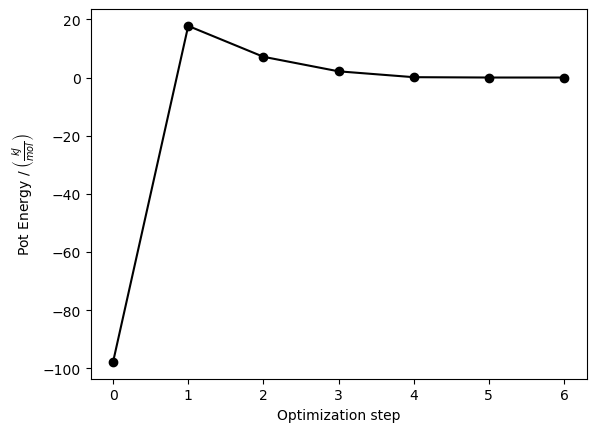

interactive(children=(IntSlider(value=0, description='conf', max=6), Output()), _dom_classes=('widget-interact…

In [25]:
### We start with the optimized molecule for the gauche conformer => mol2

mol2 = mol.clone()  # Copy it into a new molecule to preserve the geometry of the original.
                     # We will now proceed with mol2

psi4.set_options({
        "MAXITER": 100,               # default => 50
        "GEOM_MAXITER": 100,          # default => 50
#        "FULL_HESS_EVERY": 5,         # default => -1
#        "PRINT": 2,                   # default => 1
#        "GUESS": "sad",               # default => auto
#        "REFERENCE": "rhf",           # default => rhf
#        "SCF_TYPE": "direct",         # default => pk
#        "INTS_TOLERANCE": 1E-8,       # default => 1e-12. A value of 1e-8 is recommended when SCF_TYPE set to "direct"
        "G_CONVERGENCE": "QCHEM"  # default => QCHEM:  MOLPRO, GAU, GAU_LOOSE, GAU_TIGHT, INTERFRAG_TIGHT, GAU_VERYTIGHT, TURBOMOLE, CFOUR, NWCHEM_LOOSE
    })

# We will not change the settings that were created above.
psi4.set_options({"FROZEN_DIHEDRAL":""})     # Clear FROZEN_DIHEDRAL


output_file = "cyclobutene1.out"
psi4.set_output_file(output_file, append=False, loglevel=20, print_header=True, inherit_loglevel=True, execute=True)

goal = 2.0
psi4.set_options({"RANGED_DISTANCE":f"1 4 {goal-.01} {goal+.01}"})

#energy, hist = psi4.optimize("hf/STO-3G", molecule = mol2, return_history=True)
energy, hist = psi4.optimize("b3pw91/6-31+G(d)", molecule = mol2, return_history=True)




print(f"The optimized energy for this configuration is {energy:.7f} Hartree\n")

# a = np.array(hist["energy"])                 # print the energies at each step     
# b = ((a - a[-1]) * psi4.constants.hartree2kJmol) 
# for c in b: print(f"{c:10.3f}")

fig, ax =  plt.subplots(1)                     # Create a blank plot in a figure

energies = np.array(hist["energy"])            # Get the list of energies from the history of the optimization
energies = (energies - energies[-1]) * psi4.constants.hartree2kJmol   # relative energy in kJ/mole

ax.plot(energies, "ko-")                       # Plot the energies at each step
ax.set_xlabel('Optimization step')
ax.set_ylabel(r'Pot Energy /$\;\left(\frac{kJ}{mol}\right)$')
plt.show()
    
coordinates = hist["coordinates"]              # Visualize the structures at each step
traj = hp.mol2traj(mol, coordinates)
hp.drawXYZGeomSlider(traj)

### Accepting Failure

Your calculation may have turned out differently but mine did not approach a structure expected of the transition state. The C1 and C4 atoms were pushed apart to 1.9 angstroms but there was no rotation of the end groups or apparent progression to $sp^2$ from $sp^3$. I believe that the math is trapped in the higher $C_{2v}$ symmetry of the initial cyclobutadiene structure. We need to give it a push to tilt it off the crest of an energy ridge where the gradient toward rotating the end groups is zero. Either side of that ridge and it would follow a path downhill to the expected structure. However the very top of that ridge is $C_{2v}$ and it just wont vibrate off that line.

The code below captures information and prints it for our review. We see that the C1-C4 distance is indeed what was set in the code above. 

In [26]:
psi4.set_output_file("temp.dat", append=False, print_header=False)
mol2.print_distances()
mol2.print_bond_angles()
mol2.print_out()

!cat "temp.dat"     # cat is a terminal command that will print the contents of a file to stdout

        Interatomic Distances (Angstroms)

        Distance 1 to 2 1.508   
        Distance 1 to 3 2.222   
        Distance 1 to 4 1.990   
        Distance 1 to 5 1.092   
        Distance 1 to 6 1.092   
        Distance 1 to 7 2.340   
        Distance 1 to 8 3.304   
        Distance 1 to 9 2.605   
        Distance 1 to 10 2.605   
        Distance 2 to 3 1.338   
        Distance 2 to 4 2.222   
        Distance 2 to 5 2.242   
        Distance 2 to 6 2.242   
        Distance 2 to 7 1.091   
        Distance 2 to 8 2.201   
        Distance 2 to 9 2.965   
        Distance 2 to 10 2.965   
        Distance 3 to 4 1.508   
        Distance 3 to 5 2.965   
        Distance 3 to 6 2.965   
        Distance 3 to 7 2.201   
        Distance 3 to 8 1.091   
        Distance 3 to 9 2.242   
        Distance 3 to 10 2.242   
        Distance 4 to 5 2.605   
        Distance 4 to 6 2.605   
        Distance 4 to 7 3.304   
        Distance 4 to 8 2.340   
        Distance 4 to 9 1.092 

## Start Again with *s-cis* Butadiene

We will try again. this time we will start with the product of ring opening and move the terminal carbon groups closer together. First we will take the Z-matrix for *s-cis* Butadiene from previous work and oprtimize to the gauche stable conformer with a tirsion angle of about 30 degrees.

In [28]:
# use psi4conda environment
import psi4
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import helpers as hp # Many useful functions from https://lcbc-epfl.github.io/iesm-public/intro.html

psi4.core.clean_options()

output_file = "butadiene.log"

psi4.set_memory("2GB")
psi4.set_output_file(output_file, append=False, loglevel=20, print_header=True, inherit_loglevel=True, execute=True)
psi4.core.set_num_threads(4)

# The Z-matrix as a text string ### From previous optimization
data = """
       0 1
    C1
    C2      1    CC1
    C3      2    CC2           1  A_321
    C4      3    CC1           2  A_321           1     dihedral
    H5      1    CH_5_9        2  CH_512          3     D3
    H6      1    CH_6_10       5  CH_615          2     D2
    H7      2    CH_7_8        1  CH_721          3     D1
    H8      3    CH_7_8        4  CH_721          2     D1
    H9      4    CH_5_9        3  CH_512          2     D3
    H10     4    CH_6_10       9  CH_615          3     D2

       symmetry c2
       dihedral  =  30
       CC1 = 1.3
       CC2 = 1.5
       CH_5_9 = 1.0
       CH_7_8 = 1.0
       CH_6_10 = 1.0
       A_321 = 120
       CH_512 = 120
       CH_615 = 120
       CH_721 = 120
       D1 = 180
       D2 = 180
       D3 = 180

       units angstrom
       """ 

# Create the Molecule object
mol = psi4.geometry(data)             # Create Molecule object from data string

#hp.drawXYZ(mol)
hp.drawXYZ_labeled(mol)


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [31]:
# Optimize the structure
#psi4.set_options({"FROZEN_DIHEDRAL":"1 2 3 4"})

#energy_ts, hist = psi4.optimize("hf/sto-3g", molecule = mol, return_history=True)
energy_ts, hist = psi4.optimize("hf/6-31+G(d)", molecule = mol, return_history=True)
                                                                       
print(f"Initial energy is {energy_ts:0.7f} Hartrees")

print(f"321 angle: {mol.get_variable('A_321'):.3f} degrees\n") 
print(f"torsion: {mol.get_variable('dihedral'):.3f} degrees\n") 

hp.drawXYZ_labeled(mol)

psi4.set_output_file("temp.dat", append=False, print_header=False)
mol.print_in_input_format()
mol.print_distances()
mol.print_bond_angles()
mol.print_out()

!cat "temp.dat"     # cat is a terminal command that will print the contents of a file to stdout

Optimizer: Optimization complete!
Initial energy is -154.9211311 Hartrees
321 angle: 125.415 degrees

torsion: 39.771 degrees



3Dmol.js failed to load for some reason. Please check your browser console for error messages.

    Molecular point group: c2
    Full point group: C2

    Geometry (in Angstrom), charge = 0, multiplicity = 1:

    C       
    C             1         CC1
    C             2         CC2      1       A_321
    C             3         CC1      2       A_321      1    dihedral
    H             1      CH_5_9      2      CH_512      3          D3
    H             1     CH_6_10      5      CH_615      2          D2
    H             2      CH_7_8      1      CH_721      3          D1
    H             3      CH_7_8      4      CH_721      2          D1
    H             4      CH_5_9      3      CH_512      2          D3
    H             4     CH_6_10      9      CH_615      3          D2

    A_321     =  125.4145988300
    CC1       =    1.3248998689
    CC2       =    1.4779504485
    CH_512    =  121.2047307399
    CH_5_9    =    1.0752250950
    CH_615    =  116.8737654683
    CH_6_10   =    1.0758833571
    CH_721    =  118.8827124841
    CH_7_8    =    1.0786134140
    D1    

Optimizer: Optimization complete!
The optimized energy for this configuration is -155.8835964 Hartree



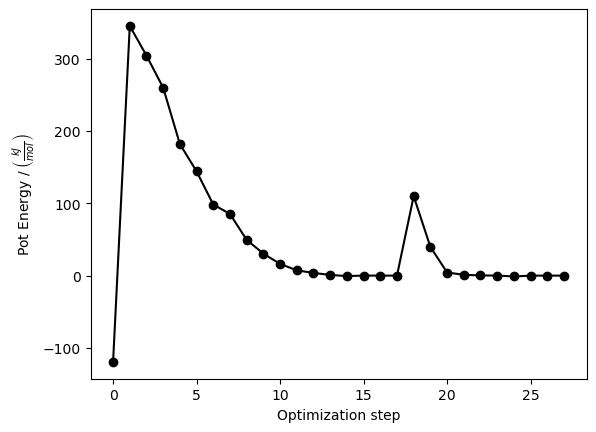

interactive(children=(IntSlider(value=0, description='conf', max=27), Output()), _dom_classes=('widget-interac…

In [32]:
### We start with the optimized molecule for the gauche conformer => mol2

mol2 = mol.clone()  # Copy it into a new molecule to preserve the geometry of the original.
                     # We will now proceed with mol2
psi4.core.clean_options()

psi4.set_options({
        "MAXITER": 100,               # default => 50
        "GEOM_MAXITER": 100,          # default => 50
#        "FULL_HESS_EVERY": 5,         # default => -1
#        "PRINT": 2,                   # default => 1
#        "GUESS": "sad",               # default => auto
#        "REFERENCE": "rhf",           # default => rhf
#        "SCF_TYPE": "direct",         # default => pk
#        "INTS_TOLERANCE": 1E-8,       # default => 1e-12. A value of 1e-8 is recommended when SCF_TYPE set to "direct"
        "G_CONVERGENCE": "QCHEM"  # default => QCHEM:  MOLPRO, GAU, GAU_LOOSE, GAU_TIGHT, INTERFRAG_TIGHT, GAU_VERYTIGHT, TURBOMOLE, CFOUR, NWCHEM_LOOSE
    })

output_file = "cyclobutene1.out"
psi4.set_output_file(output_file, append=False, loglevel=20, print_header=True, inherit_loglevel=True, execute=True)

goal = 2.0
psi4.set_options({"RANGED_DISTANCE":f"1 4 {goal-.01} {goal+.01}"})

#energy, hist = psi4.optimize("hf/STO-3G", molecule = mol2, return_history=True)
energy, hist = psi4.optimize("b3pw91/6-31+G(d)", molecule = mol2, return_history=True)




print(f"The optimized energy for this configuration is {energy:.7f} Hartree\n")

# a = np.array(hist["energy"])                 # print the energies at each step     
# b = ((a - a[-1]) * psi4.constants.hartree2kJmol) 
# for c in b: print(f"{c:10.3f}")

fig, ax =  plt.subplots(1)                     # Create a blank plot in a figure

energies = np.array(hist["energy"])            # Get the list of energies from the history of the optimization
energies = (energies - energies[-1]) * psi4.constants.hartree2kJmol   # relative energy in kJ/mole

ax.plot(energies, "ko-")                       # Plot the energies at each step
ax.set_xlabel('Optimization step')
ax.set_ylabel(r'Pot Energy /$\;\left(\frac{kJ}{mol}\right)$')
plt.show()
    
coordinates = hist["coordinates"]              # Visualize the structures at each step
traj = hp.mol2traj(mol, coordinates)
hp.drawXYZGeomSlider(traj)

In [2]:
mol2 = mol.clone()

# use psi4conda environment
import psi4
import os
import numpy as np
import matplotlib.pyplot as plt

import helpers as hp # Many useful functions from https://lcbc-epfl.github.io/iesm-public/intro.html

psi4.core.clean_options()
psi4.set_options({"FROZEN_DIHEDRAL":"1 2 3 4"})

output_file = "Butadiene_PES_1.log"
psi4.set_memory("4GB")
psi4.set_output_file(output_file, append=False, loglevel=20, print_header=True, inherit_loglevel=True, execute=True)
psi4.core.set_num_threads(4)

step = 10; start = 0; end = 180
number_of_points = (end - start)//step + 1
range_of_values = np.linspace(start, end, number_of_points) 
#range_of_values = [0,60,120,180] 
#range_of_values = [119,119.1,119.2,119.3,119.4,119.5,119.6,119.7,119.8,119.9,120,120.1] 


dihedral_list = []
energy_list = []
geometries = []
for angle in range_of_values:
    mol2.set_variable("dihedral", angle)
    energy = psi4.optimize("hf/sto-3g", molecule = mol2)
    dihedral_list.append(angle)
    energy_list.append(energy)
    geometries.append(mol2.clone())

print("Done")


Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Done


### Analyze the Data

We now have lists of dihedral angles and the energies calulated after optimizing the structure with the given frozen dihedral angle. We have also collected copies of every molecule object that resulted from these optimizations. Using this data we can plot the energy vs. torsion angle and also present in interactive display presenting the structures and their plotted energies with a slider bar to switch between them.

    angle      energy    kJ/mole
0     0.0 -153.017931   7.671128
1    10.0 -153.017919   7.702735
2    20.0 -153.017831   7.933840
3    30.0 -153.017543   8.690356
4    40.0 -153.016939  10.275816
5    50.0 -153.016000  12.742100
6    60.0 -153.014834  15.802312
7    70.0 -153.013638  18.943394
8    80.0 -153.012629  21.592541
9    90.0 -153.012015  23.204206
10  100.0 -153.011974  23.313072
11  110.0 -153.012600  21.668229
12  120.0 -153.013832  18.433426
13  130.0 -153.015441  14.208740
14  140.0 -153.017115   9.814253
15  150.0 -153.018662   5.754041
16  160.0 -153.019851   2.632730
17  170.0 -153.020599   0.668695
18  180.0 -153.020853   0.000000


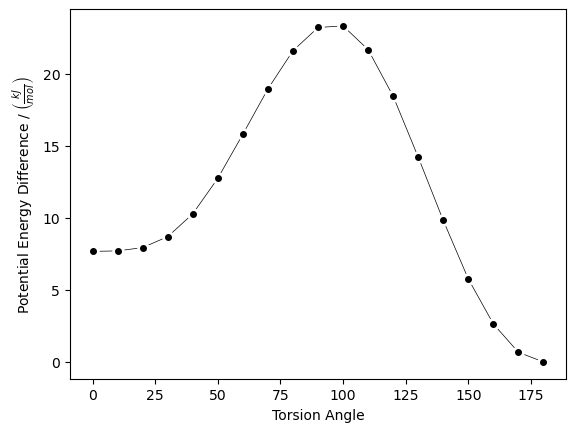

interactive(children=(IntSlider(value=0, description='quantity', max=180, step=10), Output()), _dom_classes=('…

In [14]:
data_dictionary = {"angle": dihedral_list,
                   "energy": energy_list}

df = pd.DataFrame.from_dict(data_dictionary)

df["kJ/mole"] = df["energy"] - np.min(df["energy"])
df["kJ/mole"] = df["kJ/mole"] * psi4.constants.hartree2kJmol

print(df)

fig, ax =  plt.subplots(1)                     # Create a blank plot in a figure

x = df["angle"]
y = df["kJ/mole"]

ax.plot(x,y, color = "black", linewidth = 0.5, zorder = 0)

ax.scatter(x,y, color = "white", s = 64, zorder = 1)
ax.scatter(x,y, color = "black", s = 16, zorder = 2)

# ax.vlines(x = 66.5, ymin = 0, ymax = 20, color = "black", linewidth = 0.4, zorder = 0)
# ax.scatter([66.51, 360-66.51], [3.49, 3.49], color = "white", s = 64, zorder = 1)
# ax.text(66.51-10, 20.5,"$66.5^\circ$")

ax.set_xlabel('Torsion Angle')
ax.set_ylabel(r'Potential Energy Difference /$\;\left(\frac{kJ}{mol}\right)$')

plt.show()

energies = energies = df["energy"]
energies = energies - np.min(energies)
energies = energies * psi4.constants.hartree2kJmol
import helpers as hp

traj = [geom.save_string_xyz_file() for geom in geometries3]
traj_arrays = [geom.to_arrays()[0] for geom in geometries3]

#hp.drawXYZGeomSlider(traj)
dihedral_list1 = np.array(dihedral_list)
hp.drawXYZGeomSliderMolecularProperty(traj, dihedral_list1, energies, 'dihedral')




### Observations

The PES shows that the planar forms are lowest in energy with the dihedral being zero degrees for the *cis* conformer and 180 degrees for the *trans* conformer. This is what we might have expected as the planar structures benefit from the graetest stabilization due to the electron delocalization of conjugation.  The *cis* conformer is about 7.7 kJ/mole higher in energy than the *trans* conformer due to steric clash.

The energy gardient in the region of the *cis* conformer is very flat. The difference in energy from -10 degree to +10 degrees is 0.03 kJ/mole compare to zero degrees. The optimized structure at HF/STO-3G for the *cic* conformer had a tersion angle of 2 degrees when using $C_1$ symmetry but that was corrected easily by enforcing $C_2$ symmetry, which gave zero degrees for the torsion. The very flat energy landscape allowed the structure to minimize to angles other than zero.

This all looks so reasonable except that we know it is wrong. Extensive and much more sophisticated quantum mechanics caluclations indicate that a "twisted cis" conformer with a torsion angle of about 38 degrees is more stable than the planar *cis* conformer. [Feller, 2009] Previous spectroscopic studies have also indicated the presence of this conformer. [Engeln, 1992].<hr>

"High Level ab Initio Energies and Structures for the Rotamers of 1,3-Butadiene." D. Feller, N.C. Craig, 
*J. Phys. Chem. A*, **2009**, *113*, 1601-1607. https://doi.org/10.1021/jp8095709

"Evidence for a gauche minor conformer of 1,3-butadiene." R. Engeln, D. Consalvo, J. Reuss, *Chem. Phys.*, **1992**, *160*, 427-433. https://doi.org/10.1016/0301-0104(92)80010-S

## Another PES Scan

The STO-3G minimal basis set is placing too much weight on the electron delocalization compared to the steric interaction. Or perhaps it is not able to value the steric interaction correctly. To investigate this we will use a more extensive basis set. We could use 3-21G, 6-31+G(d), 6-31++G(d,p), or 6-311++G(d,p). Rather than HF, we could use a DFT method that incorporates dispersion effects like b3pw91.

Use the code below and go get a coffee while it runs.


In [ ]:
mol3 = mol.clone()

# use psi4conda environment
import psi4
import os
import numpy as np
import matplotlib.pyplot as plt

import helpers as hp # Many useful functions from https://lcbc-epfl.github.io/iesm-public/intro.html

psi4.core.clean_options()
psi4.set_options({"FROZEN_DIHEDRAL":"1 2 3 4"})

output_file = "Butadiene_PES_2.log"
psi4.set_memory("4GB")
psi4.set_output_file(output_file, append=False, loglevel=20, print_header=True, inherit_loglevel=True, execute=True)
psi4.core.set_num_threads(4)

step = 10; start = 0; end = 180
number_of_points = (end - start)//step + 1
range_of_values = np.linspace(start, end, number_of_points) 
#range_of_values = [0,60,120,180] 
#range_of_values = [119,119.1,119.2,119.3,119.4,119.5,119.6,119.7,119.8,119.9,120,120.1] 


dihedral_list3 = []
energy_list3 = []
geometries3 = []
for angle in range_of_values:
    mol3.set_variable("dihedral", angle)
#    energy = psi4.optimize("hf/6-31+G(d)", molecule = mol3)
    energy = psi4.optimize("b3pw91/6-31+G(d)", molecule = mol3)
    dihedral_list3.append(angle)
    energy_list3.append(energy)
    geometries3.append(mol3.clone())

print("Done")

In [45]:
# Collect the results in a dataframe for easy printing and data output.

data_dictionary = {"angle": dihedral_list3,
                   "energy": energy_list3}

df = pd.DataFrame.from_dict(data_dictionary)

df["kJ/mole"] = df["energy"] - np.min(df["energy"])
df["kJ/mole"] = df["kJ/mole"] * psi4.constants.hartree2kJmol

#print(df)

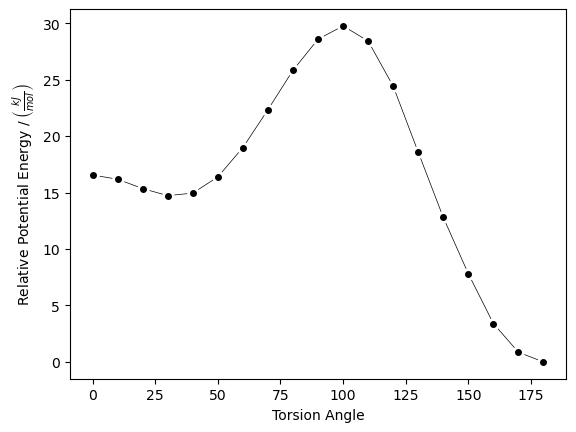

In [46]:
# Plot the energies vs the torsion angle.

fig, ax =  plt.subplots(1)                     # Create a blank plot in a figure

x = df["angle"]
y = df["kJ/mole"]

ax.plot(x,y, color = "black", linewidth = 0.5, zorder = 0)

ax.scatter(x,y, color = "white", s = 64, zorder = 1)
ax.scatter(x,y, color = "black", s = 16, zorder = 2)

# ax.vlines(x = 66.5, ymin = 0, ymax = 20, color = "black", linewidth = 0.4, zorder = 0)
# ax.scatter([66.51, 360-66.51], [3.49, 3.49], color = "white", s = 64, zorder = 1)
# ax.text(66.51-10, 20.5,"$66.5^\circ$")

#ax.set_xlim([start-10, end+10])

ax.set_xlabel('Torsion Angle')
ax.set_ylabel(r'Relative Potential Energy /$\;\left(\frac{kJ}{mol}\right)$')

plt.show()


In [13]:
# Visualize the series of optimized structures along with the energy plot

energies = df["energy"]
energies = energies - np.min(energies)
energies = energies * psi4.constants.hartree2kJmol
import helpers as hp

traj = [geom.save_string_xyz_file() for geom in geometries3]
traj_arrays = [geom.to_arrays()[0] for geom in geometries3]

#hp.drawXYZGeomSlider(traj)
dihedral_list4 = np.array(dihedral_list3)
hp.drawXYZGeomSliderMolecularProperty(traj, dihedral_list4, energies, 'dihedral')


interactive(children=(IntSlider(value=0, description='quantity', max=180, step=10), Output()), _dom_classes=('…

In [23]:
print(traj[17])

10

 C    1.747029389417    0.607552292118    0.045278721184
 C    0.408327312045    0.602805225263   -0.051463647590
 C   -0.408327312045   -0.602805225263   -0.051463647590
 C   -1.747029389417   -0.607552292118    0.045278721184
 H    2.313969897750    1.534097960815    0.067346574175
 H    2.317239468008   -0.318077317380    0.101767365677
 H   -0.127616649192    1.552140342694   -0.095471080726
 H    0.127616649192   -1.552140342694   -0.095471080726
 H   -2.313969897750   -1.534097960815    0.067346574175
 H   -2.317239468008    0.318077317380    0.101767365677



In [40]:
int(np.asarray(dihedral_list4==20).nonzero()[0])

/var/folders/_0/pb9y62rd59n_3vs7rbl1bndm0000gn/T/ipykernel_98174/1866632485.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  int(np.asarray(dihedral_list4==20).nonzero()[0])


2

In [44]:
i = np.where(dihedral_list4==40)[0][0]
int(i)

4